Note: this analysis is for 13/74-5

TODO: requires 20 GB memory, make it more memory efficient?

## Get states for each work trajectory for A39D

In [5]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [7]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/75/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [ ]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [ ]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [ ]:
indices_old

In [7]:
indices_new

[628, 629, 632, 637]

In [8]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:31<00:00,  3.13it/s]

new files found: 100


#### Get dihedrals for complex

In [9]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/75/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [10]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [11]:
dihedral_atoms = [['N', 'CA', 'CB', 'HB1'], ['N', 'CA', 'CB', 'CG']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [12]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom)

<Atom 0 (CH3) of chain 0 residue 0 (ACE)>
<Atom 1 (C) of chain 0 residue 0 (ACE)>
<Atom 2 (O) of chain 0 residue 0 (ACE)>
<Atom 3 (H1) of chain 0 residue 0 (ACE)>
<Atom 4 (H2) of chain 0 residue 0 (ACE)>
<Atom 5 (H3) of chain 0 residue 0 (ACE)>
<Atom 6 (N) of chain 0 residue 1 (LYS)>
<Atom 7 (CA) of chain 0 residue 1 (LYS)>
<Atom 8 (C) of chain 0 residue 1 (LYS)>
<Atom 9 (O) of chain 0 residue 1 (LYS)>
<Atom 10 (CB) of chain 0 residue 1 (LYS)>
<Atom 11 (CG) of chain 0 residue 1 (LYS)>
<Atom 12 (CD) of chain 0 residue 1 (LYS)>
<Atom 13 (CE) of chain 0 residue 1 (LYS)>
<Atom 14 (NZ) of chain 0 residue 1 (LYS)>
<Atom 15 (H2) of chain 0 residue 1 (LYS)>
<Atom 16 (HA) of chain 0 residue 1 (LYS)>
<Atom 17 (HB3) of chain 0 residue 1 (LYS)>
<Atom 18 (HB2) of chain 0 residue 1 (LYS)>
<Atom 19 (HG2) of chain 0 residue 1 (LYS)>
<Atom 20 (HG3) of chain 0 residue 1 (LYS)>
<Atom 21 (HD2) of chain 0 residue 1 (LYS)>
<Atom 22 (HD3) of chain 0 residue 1 (LYS)>
<Atom 23 (HE3) of chain 0 residue 1 (LYS)>

<Atom 4213 (H1) of chain 4 residue 555 (HOH)>
<Atom 4214 (H2) of chain 4 residue 555 (HOH)>
<Atom 4215 (O) of chain 4 residue 556 (HOH)>
<Atom 4216 (H1) of chain 4 residue 556 (HOH)>
<Atom 4217 (H2) of chain 4 residue 556 (HOH)>
<Atom 4218 (O) of chain 4 residue 557 (HOH)>
<Atom 4219 (H1) of chain 4 residue 557 (HOH)>
<Atom 4220 (H2) of chain 4 residue 557 (HOH)>
<Atom 4221 (O) of chain 4 residue 558 (HOH)>
<Atom 4222 (H1) of chain 4 residue 558 (HOH)>
<Atom 4223 (H2) of chain 4 residue 558 (HOH)>
<Atom 4224 (O) of chain 4 residue 559 (HOH)>
<Atom 4225 (H1) of chain 4 residue 559 (HOH)>
<Atom 4226 (H2) of chain 4 residue 559 (HOH)>
<Atom 4227 (O) of chain 4 residue 560 (HOH)>
<Atom 4228 (H1) of chain 4 residue 560 (HOH)>
<Atom 4229 (H2) of chain 4 residue 560 (HOH)>
<Atom 4230 (O) of chain 4 residue 561 (HOH)>
<Atom 4231 (H1) of chain 4 residue 561 (HOH)>
<Atom 4232 (H2) of chain 4 residue 561 (HOH)>
<Atom 4233 (O) of chain 4 residue 562 (HOH)>
<Atom 4234 (H1) of chain 4 residue 562 (H

<Atom 8212 (H1) of chain 4 residue 1888 (HOH)>
<Atom 8213 (H2) of chain 4 residue 1888 (HOH)>
<Atom 8214 (O) of chain 4 residue 1889 (HOH)>
<Atom 8215 (H1) of chain 4 residue 1889 (HOH)>
<Atom 8216 (H2) of chain 4 residue 1889 (HOH)>
<Atom 8217 (O) of chain 4 residue 1890 (HOH)>
<Atom 8218 (H1) of chain 4 residue 1890 (HOH)>
<Atom 8219 (H2) of chain 4 residue 1890 (HOH)>
<Atom 8220 (O) of chain 4 residue 1891 (HOH)>
<Atom 8221 (H1) of chain 4 residue 1891 (HOH)>
<Atom 8222 (H2) of chain 4 residue 1891 (HOH)>
<Atom 8223 (O) of chain 4 residue 1892 (HOH)>
<Atom 8224 (H1) of chain 4 residue 1892 (HOH)>
<Atom 8225 (H2) of chain 4 residue 1892 (HOH)>
<Atom 8226 (O) of chain 4 residue 1893 (HOH)>
<Atom 8227 (H1) of chain 4 residue 1893 (HOH)>
<Atom 8228 (H2) of chain 4 residue 1893 (HOH)>
<Atom 8229 (O) of chain 4 residue 1894 (HOH)>
<Atom 8230 (H1) of chain 4 residue 1894 (HOH)>
<Atom 8231 (H2) of chain 4 residue 1894 (HOH)>
<Atom 8232 (O) of chain 4 residue 1895 (HOH)>
<Atom 8233 (H1) of c

<Atom 12212 (H2) of chain 4 residue 3221 (HOH)>
<Atom 12213 (O) of chain 4 residue 3222 (HOH)>
<Atom 12214 (H1) of chain 4 residue 3222 (HOH)>
<Atom 12215 (H2) of chain 4 residue 3222 (HOH)>
<Atom 12216 (O) of chain 4 residue 3223 (HOH)>
<Atom 12217 (H1) of chain 4 residue 3223 (HOH)>
<Atom 12218 (H2) of chain 4 residue 3223 (HOH)>
<Atom 12219 (O) of chain 4 residue 3224 (HOH)>
<Atom 12220 (H1) of chain 4 residue 3224 (HOH)>
<Atom 12221 (H2) of chain 4 residue 3224 (HOH)>
<Atom 12222 (O) of chain 4 residue 3225 (HOH)>
<Atom 12223 (H1) of chain 4 residue 3225 (HOH)>
<Atom 12224 (H2) of chain 4 residue 3225 (HOH)>
<Atom 12225 (O) of chain 4 residue 3226 (HOH)>
<Atom 12226 (H1) of chain 4 residue 3226 (HOH)>
<Atom 12227 (H2) of chain 4 residue 3226 (HOH)>
<Atom 12228 (O) of chain 4 residue 3227 (HOH)>
<Atom 12229 (H1) of chain 4 residue 3227 (HOH)>
<Atom 12230 (H2) of chain 4 residue 3227 (HOH)>
<Atom 12231 (O) of chain 4 residue 3228 (HOH)>
<Atom 12232 (H1) of chain 4 residue 3228 (HOH)>

<Atom 16711 (H1) of chain 4 residue 4721 (HOH)>
<Atom 16712 (H2) of chain 4 residue 4721 (HOH)>
<Atom 16713 (O) of chain 4 residue 4722 (HOH)>
<Atom 16714 (H1) of chain 4 residue 4722 (HOH)>
<Atom 16715 (H2) of chain 4 residue 4722 (HOH)>
<Atom 16716 (O) of chain 4 residue 4723 (HOH)>
<Atom 16717 (H1) of chain 4 residue 4723 (HOH)>
<Atom 16718 (H2) of chain 4 residue 4723 (HOH)>
<Atom 16719 (O) of chain 4 residue 4724 (HOH)>
<Atom 16720 (H1) of chain 4 residue 4724 (HOH)>
<Atom 16721 (H2) of chain 4 residue 4724 (HOH)>
<Atom 16722 (O) of chain 4 residue 4725 (HOH)>
<Atom 16723 (H1) of chain 4 residue 4725 (HOH)>
<Atom 16724 (H2) of chain 4 residue 4725 (HOH)>
<Atom 16725 (O) of chain 4 residue 4726 (HOH)>
<Atom 16726 (H1) of chain 4 residue 4726 (HOH)>
<Atom 16727 (H2) of chain 4 residue 4726 (HOH)>
<Atom 16728 (O) of chain 4 residue 4727 (HOH)>
<Atom 16729 (H1) of chain 4 residue 4727 (HOH)>
<Atom 16730 (H2) of chain 4 residue 4727 (HOH)>
<Atom 16731 (O) of chain 4 residue 4728 (HOH)>

<Atom 21211 (H1) of chain 4 residue 6221 (HOH)>
<Atom 21212 (H2) of chain 4 residue 6221 (HOH)>
<Atom 21213 (O) of chain 4 residue 6222 (HOH)>
<Atom 21214 (H1) of chain 4 residue 6222 (HOH)>
<Atom 21215 (H2) of chain 4 residue 6222 (HOH)>
<Atom 21216 (O) of chain 4 residue 6223 (HOH)>
<Atom 21217 (H1) of chain 4 residue 6223 (HOH)>
<Atom 21218 (H2) of chain 4 residue 6223 (HOH)>
<Atom 21219 (O) of chain 4 residue 6224 (HOH)>
<Atom 21220 (H1) of chain 4 residue 6224 (HOH)>
<Atom 21221 (H2) of chain 4 residue 6224 (HOH)>
<Atom 21222 (O) of chain 4 residue 6225 (HOH)>
<Atom 21223 (H1) of chain 4 residue 6225 (HOH)>
<Atom 21224 (H2) of chain 4 residue 6225 (HOH)>
<Atom 21225 (O) of chain 4 residue 6226 (HOH)>
<Atom 21226 (H1) of chain 4 residue 6226 (HOH)>
<Atom 21227 (H2) of chain 4 residue 6226 (HOH)>
<Atom 21228 (O) of chain 4 residue 6227 (HOH)>
<Atom 21229 (H1) of chain 4 residue 6227 (HOH)>
<Atom 21230 (H2) of chain 4 residue 6227 (HOH)>
<Atom 21231 (O) of chain 4 residue 6228 (HOH)>

<Atom 25710 (O) of chain 4 residue 7721 (HOH)>
<Atom 25711 (H1) of chain 4 residue 7721 (HOH)>
<Atom 25712 (H2) of chain 4 residue 7721 (HOH)>
<Atom 25713 (O) of chain 4 residue 7722 (HOH)>
<Atom 25714 (H1) of chain 4 residue 7722 (HOH)>
<Atom 25715 (H2) of chain 4 residue 7722 (HOH)>
<Atom 25716 (O) of chain 4 residue 7723 (HOH)>
<Atom 25717 (H1) of chain 4 residue 7723 (HOH)>
<Atom 25718 (H2) of chain 4 residue 7723 (HOH)>
<Atom 25719 (O) of chain 4 residue 7724 (HOH)>
<Atom 25720 (H1) of chain 4 residue 7724 (HOH)>
<Atom 25721 (H2) of chain 4 residue 7724 (HOH)>
<Atom 25722 (O) of chain 4 residue 7725 (HOH)>
<Atom 25723 (H1) of chain 4 residue 7725 (HOH)>
<Atom 25724 (H2) of chain 4 residue 7725 (HOH)>
<Atom 25725 (O) of chain 4 residue 7726 (HOH)>
<Atom 25726 (H1) of chain 4 residue 7726 (HOH)>
<Atom 25727 (H2) of chain 4 residue 7726 (HOH)>
<Atom 25728 (O) of chain 4 residue 7727 (HOH)>
<Atom 25729 (H1) of chain 4 residue 7727 (HOH)>
<Atom 25730 (H2) of chain 4 residue 7727 (HOH)>

In [ ]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


 71%|███████   | 71/100 [00:33<00:13,  2.10it/s]

In [ ]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [ ]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [ ]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

In [ ]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

In [ ]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on A39D

In [1]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [2]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [3]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["A42T"]
d_results = {}
d_phases = {}
first = 75
for i in tqdm_notebook([75]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 75
job: 0
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 1
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 2
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 3
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 4
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 5
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 6
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 7
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 8
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 9
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 10
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 11
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 12
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 13
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 14
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 15
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 16
(1, 500001)
(1, 500001)
(1, 500001)
(1, 500001)
job: 17
(1, 500001)
(1, 500001)
(1, 500001)
(1, 50

In [4]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [0,1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

NameError: name 'states_forward_apo' is not defined

In [ ]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [30]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [31]:
import tqdm
states_apo = [0]
states_complex = [0]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:04<00:00, 154.89it/s]


In [32]:
dgs_state_all_A42T = dgs_state_all

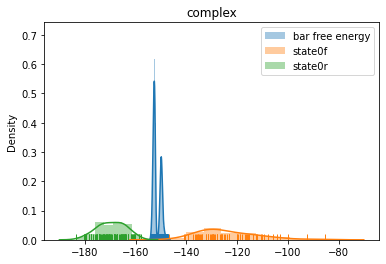

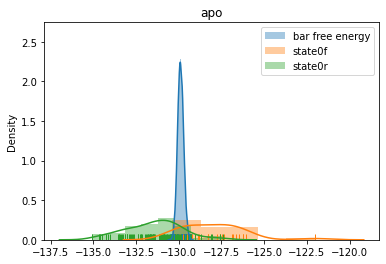

In [33]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

## Get states for each work trajectory for D39A

In [35]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [36]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [37]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/50/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [38]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [39]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'], ['N', 'CA', 'CB', 'HB1']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [40]:
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]

new files found: 100


#### Get dihedrals for complex

In [41]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/50/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [42]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [43]:
dihedral_atoms = [['N', 'CA', 'CB', 'CG'], ['N', 'CA', 'CB', 'HB1']]
for res in htf._topology_proposal.old_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_old = res
for res in htf._topology_proposal.new_topology.residues():
    if res.id == '39' and res.chain.index == 0:
        residue_new = res
indices_old = [atom.index for atom in residue_old.atoms() if atom.name in dihedral_atoms[0]]
indices_new = [atom.index for atom in residue_new.atoms() if atom.name in dihedral_atoms[1]]

In [44]:
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [01:13<00:00,  1.36it/s]

new files found: 97


In [45]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [46]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [47]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

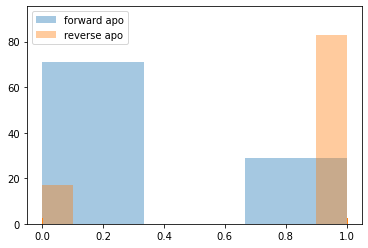

In [48]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

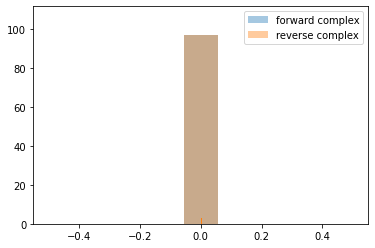

In [49]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

In [50]:
for atom in htf.hybrid_topology.atoms:
    print(atom, atom.index)

ACE0-CH3 0
ACE0-C 1
ACE0-O 2
ACE0-H1 3
ACE0-H2 4
ACE0-H3 5
LYS1-N 6
LYS1-CA 7
LYS1-C 8
LYS1-O 9
LYS1-CB 10
LYS1-CG 11
LYS1-CD 12
LYS1-CE 13
LYS1-NZ 14
LYS1-H2 15
LYS1-HA 16
LYS1-HB3 17
LYS1-HB2 18
LYS1-HG2 19
LYS1-HG3 20
LYS1-HD2 21
LYS1-HD3 22
LYS1-HE3 23
LYS1-HE2 24
LYS1-HZ1 25
LYS1-HZ2 26
LYS1-HZ3 27
LYS2-N 28
LYS2-CA 29
LYS2-C 30
LYS2-O 31
LYS2-CB 32
LYS2-CG 33
LYS2-CD 34
LYS2-CE 35
LYS2-NZ 36
LYS2-H 37
LYS2-HA 38
LYS2-HB3 39
LYS2-HB2 40
LYS2-HG2 41
LYS2-HG3 42
LYS2-HD3 43
LYS2-HD2 44
LYS2-HE3 45
LYS2-HE2 46
LYS2-HZ1 47
LYS2-HZ2 48
LYS2-HZ3 49
ALA3-N 50
ALA3-CA 51
ALA3-C 52
ALA3-O 53
ALA3-CB 54
ALA3-H 55
ALA3-HA 56
ALA3-HB1 57
ALA3-HB2 58
ALA3-HB3 59
VAL4-N 60
VAL4-CA 61
VAL4-C 62
VAL4-O 63
VAL4-CB 64
VAL4-CG1 65
VAL4-CG2 66
VAL4-H 67
VAL4-HA 68
VAL4-HB 69
VAL4-HG11 70
VAL4-HG12 71
VAL4-HG13 72
VAL4-HG21 73
VAL4-HG22 74
VAL4-HG23 75
ILE5-N 76
ILE5-CA 77
ILE5-C 78
ILE5-O 79
ILE5-CB 80
ILE5-CG1 81
ILE5-CG2 82
ILE5-CD1 83
ILE5-H 84
ILE5-HA 85
ILE5-HB 86
ILE5-HG13 87
ILE5-HG12 88
ILE5-

ARG75-N 1209
ARG75-CA 1210
ARG75-C 1211
ARG75-O 1212
ARG75-CB 1213
ARG75-CG 1214
ARG75-CD 1215
ARG75-NE 1216
ARG75-CZ 1217
ARG75-NH1 1218
ARG75-NH2 1219
ARG75-H 1220
ARG75-HA 1221
ARG75-HB3 1222
ARG75-HB2 1223
ARG75-HG3 1224
ARG75-HG2 1225
ARG75-HD3 1226
ARG75-HD2 1227
ARG75-HE 1228
ARG75-HH11 1229
ARG75-HH12 1230
ARG75-HH21 1231
ARG75-HH22 1232
GLU76-N 1233
GLU76-CA 1234
GLU76-C 1235
GLU76-O 1236
GLU76-CB 1237
GLU76-CG 1238
GLU76-CD 1239
GLU76-OE1 1240
GLU76-OE2 1241
GLU76-H 1242
GLU76-HA 1243
GLU76-HB3 1244
GLU76-HB2 1245
GLU76-HG3 1246
GLU76-HG2 1247
ALA77-N 1248
ALA77-CA 1249
ALA77-C 1250
ALA77-O 1251
ALA77-CB 1252
ALA77-H 1253
ALA77-HA 1254
ALA77-HB1 1255
ALA77-HB2 1256
ALA77-HB3 1257
LYS78-N 1258
LYS78-CA 1259
LYS78-C 1260
LYS78-O 1261
LYS78-CB 1262
LYS78-CG 1263
LYS78-CD 1264
LYS78-CE 1265
LYS78-NZ 1266
LYS78-H 1267
LYS78-HA 1268
LYS78-HB3 1269
LYS78-HB2 1270
LYS78-HG3 1271
LYS78-HG2 1272
LYS78-HD3 1273
LYS78-HD2 1274
LYS78-HE2 1275
LYS78-HE3 1276
LYS78-HZ1 1277
LYS78-HZ2 1278
L

THR70-HA 2459
THR70-HB 2460
THR70-HG1 2461
THR70-HG21 2462
THR70-HG22 2463
THR70-HG23 2464
TRP71-N 2465
TRP71-CA 2466
TRP71-C 2467
TRP71-O 2468
TRP71-CB 2469
TRP71-CG 2470
TRP71-CD1 2471
TRP71-CD2 2472
TRP71-NE1 2473
TRP71-CE2 2474
TRP71-CE3 2475
TRP71-CZ2 2476
TRP71-CZ3 2477
TRP71-CH2 2478
TRP71-H 2479
TRP71-HA 2480
TRP71-HB3 2481
TRP71-HB2 2482
TRP71-HD1 2483
TRP71-HE1 2484
TRP71-HE3 2485
TRP71-HZ2 2486
TRP71-HZ3 2487
TRP71-HH2 2488
ARG72-N 2489
ARG72-CA 2490
ARG72-C 2491
ARG72-O 2492
ARG72-CB 2493
ARG72-CG 2494
ARG72-CD 2495
ARG72-NE 2496
ARG72-CZ 2497
ARG72-NH1 2498
ARG72-NH2 2499
ARG72-H 2500
ARG72-HA 2501
ARG72-HB3 2502
ARG72-HB2 2503
ARG72-HG3 2504
ARG72-HG2 2505
ARG72-HD3 2506
ARG72-HD2 2507
ARG72-HE 2508
ARG72-HH11 2509
ARG72-HH12 2510
ARG72-HH21 2511
ARG72-HH22 2512
GLU73-N 2513
GLU73-CA 2514
GLU73-C 2515
GLU73-O 2516
GLU73-CB 2517
GLU73-CG 2518
GLU73-CD 2519
GLU73-OE1 2520
GLU73-OE2 2521
GLU73-H 2522
GLU73-HA 2523
GLU73-HB2 2524
GLU73-HB3 2525
GLU73-HG2 2526
GLU73-HG3 2527
A

HOH388-H1 3709
HOH388-H2 3710
HOH389-O 3711
HOH389-H1 3712
HOH389-H2 3713
HOH390-O 3714
HOH390-H1 3715
HOH390-H2 3716
HOH391-O 3717
HOH391-H1 3718
HOH391-H2 3719
HOH392-O 3720
HOH392-H1 3721
HOH392-H2 3722
HOH393-O 3723
HOH393-H1 3724
HOH393-H2 3725
HOH394-O 3726
HOH394-H1 3727
HOH394-H2 3728
HOH395-O 3729
HOH395-H1 3730
HOH395-H2 3731
HOH396-O 3732
HOH396-H1 3733
HOH396-H2 3734
HOH397-O 3735
HOH397-H1 3736
HOH397-H2 3737
HOH398-O 3738
HOH398-H1 3739
HOH398-H2 3740
HOH399-O 3741
HOH399-H1 3742
HOH399-H2 3743
HOH400-O 3744
HOH400-H1 3745
HOH400-H2 3746
HOH401-O 3747
HOH401-H1 3748
HOH401-H2 3749
HOH402-O 3750
HOH402-H1 3751
HOH402-H2 3752
HOH403-O 3753
HOH403-H1 3754
HOH403-H2 3755
HOH404-O 3756
HOH404-H1 3757
HOH404-H2 3758
HOH405-O 3759
HOH405-H1 3760
HOH405-H2 3761
HOH406-O 3762
HOH406-H1 3763
HOH406-H2 3764
HOH407-O 3765
HOH407-H1 3766
HOH407-H2 3767
HOH408-O 3768
HOH408-H1 3769
HOH408-H2 3770
HOH409-O 3771
HOH409-H1 3772
HOH409-H2 3773
HOH410-O 3774
HOH410-H1 3775
HOH410-H2 3776
HO

HOH889-H1 5209
HOH889-H2 5210
HOH890-O 5211
HOH890-H1 5212
HOH890-H2 5213
HOH891-O 5214
HOH891-H1 5215
HOH891-H2 5216
HOH892-O 5217
HOH892-H1 5218
HOH892-H2 5219
HOH893-O 5220
HOH893-H1 5221
HOH893-H2 5222
HOH894-O 5223
HOH894-H1 5224
HOH894-H2 5225
HOH895-O 5226
HOH895-H1 5227
HOH895-H2 5228
HOH896-O 5229
HOH896-H1 5230
HOH896-H2 5231
HOH897-O 5232
HOH897-H1 5233
HOH897-H2 5234
HOH898-O 5235
HOH898-H1 5236
HOH898-H2 5237
HOH899-O 5238
HOH899-H1 5239
HOH899-H2 5240
HOH900-O 5241
HOH900-H1 5242
HOH900-H2 5243
HOH901-O 5244
HOH901-H1 5245
HOH901-H2 5246
HOH902-O 5247
HOH902-H1 5248
HOH902-H2 5249
HOH903-O 5250
HOH903-H1 5251
HOH903-H2 5252
HOH904-O 5253
HOH904-H1 5254
HOH904-H2 5255
HOH905-O 5256
HOH905-H1 5257
HOH905-H2 5258
HOH906-O 5259
HOH906-H1 5260
HOH906-H2 5261
HOH907-O 5262
HOH907-H1 5263
HOH907-H2 5264
HOH908-O 5265
HOH908-H1 5266
HOH908-H2 5267
HOH909-O 5268
HOH909-H1 5269
HOH909-H2 5270
HOH910-O 5271
HOH910-H1 5272
HOH910-H2 5273
HOH911-O 5274
HOH911-H1 5275
HOH911-H2 5276
HO

HOH1308-H2 6458
HOH1309-O 6459
HOH1309-H1 6460
HOH1309-H2 6461
HOH1310-O 6462
HOH1310-H1 6463
HOH1310-H2 6464
HOH1311-O 6465
HOH1311-H1 6466
HOH1311-H2 6467
HOH1312-O 6468
HOH1312-H1 6469
HOH1312-H2 6470
HOH1313-O 6471
HOH1313-H1 6472
HOH1313-H2 6473
HOH1314-O 6474
HOH1314-H1 6475
HOH1314-H2 6476
HOH1315-O 6477
HOH1315-H1 6478
HOH1315-H2 6479
HOH1316-O 6480
HOH1316-H1 6481
HOH1316-H2 6482
HOH1317-O 6483
HOH1317-H1 6484
HOH1317-H2 6485
HOH1318-O 6486
HOH1318-H1 6487
HOH1318-H2 6488
HOH1319-O 6489
HOH1319-H1 6490
HOH1319-H2 6491
HOH1320-O 6492
HOH1320-H1 6493
HOH1320-H2 6494
HOH1321-O 6495
HOH1321-H1 6496
HOH1321-H2 6497
HOH1322-O 6498
HOH1322-H1 6499
HOH1322-H2 6500
HOH1323-O 6501
HOH1323-H1 6502
HOH1323-H2 6503
HOH1324-O 6504
HOH1324-H1 6505
HOH1324-H2 6506
HOH1325-O 6507
HOH1325-H1 6508
HOH1325-H2 6509
HOH1326-O 6510
HOH1326-H1 6511
HOH1326-H2 6512
HOH1327-O 6513
HOH1327-H1 6514
HOH1327-H2 6515
HOH1328-O 6516
HOH1328-H1 6517
HOH1328-H2 6518
HOH1329-O 6519
HOH1329-H1 6520
HOH1329-H2 65

HOH1808-H2 7958
HOH1809-O 7959
HOH1809-H1 7960
HOH1809-H2 7961
HOH1810-O 7962
HOH1810-H1 7963
HOH1810-H2 7964
HOH1811-O 7965
HOH1811-H1 7966
HOH1811-H2 7967
HOH1812-O 7968
HOH1812-H1 7969
HOH1812-H2 7970
HOH1813-O 7971
HOH1813-H1 7972
HOH1813-H2 7973
HOH1814-O 7974
HOH1814-H1 7975
HOH1814-H2 7976
HOH1815-O 7977
HOH1815-H1 7978
HOH1815-H2 7979
HOH1816-O 7980
HOH1816-H1 7981
HOH1816-H2 7982
HOH1817-O 7983
HOH1817-H1 7984
HOH1817-H2 7985
HOH1818-O 7986
HOH1818-H1 7987
HOH1818-H2 7988
HOH1819-O 7989
HOH1819-H1 7990
HOH1819-H2 7991
HOH1820-O 7992
HOH1820-H1 7993
HOH1820-H2 7994
HOH1821-O 7995
HOH1821-H1 7996
HOH1821-H2 7997
HOH1822-O 7998
HOH1822-H1 7999
HOH1822-H2 8000
HOH1823-O 8001
HOH1823-H1 8002
HOH1823-H2 8003
HOH1824-O 8004
HOH1824-H1 8005
HOH1824-H2 8006
HOH1825-O 8007
HOH1825-H1 8008
HOH1825-H2 8009
HOH1826-O 8010
HOH1826-H1 8011
HOH1826-H2 8012
HOH1827-O 8013
HOH1827-H1 8014
HOH1827-H2 8015
HOH1828-O 8016
HOH1828-H1 8017
HOH1828-H2 8018
HOH1829-O 8019
HOH1829-H1 8020
HOH1829-H2 80

HOH2311-H2 9458
HOH2312-O 9459
HOH2312-H1 9460
HOH2312-H2 9461
HOH2313-O 9462
HOH2313-H1 9463
HOH2313-H2 9464
HOH2314-O 9465
HOH2314-H1 9466
HOH2314-H2 9467
HOH2315-O 9468
HOH2315-H1 9469
HOH2315-H2 9470
HOH2316-O 9471
HOH2316-H1 9472
HOH2316-H2 9473
HOH2317-O 9474
HOH2317-H1 9475
HOH2317-H2 9476
HOH2318-O 9477
HOH2318-H1 9478
HOH2318-H2 9479
HOH2319-O 9480
HOH2319-H1 9481
HOH2319-H2 9482
HOH2320-O 9483
HOH2320-H1 9484
HOH2320-H2 9485
HOH2321-O 9486
HOH2321-H1 9487
HOH2321-H2 9488
HOH2322-O 9489
HOH2322-H1 9490
HOH2322-H2 9491
HOH2323-O 9492
HOH2323-H1 9493
HOH2323-H2 9494
HOH2324-O 9495
HOH2324-H1 9496
HOH2324-H2 9497
HOH2325-O 9498
HOH2325-H1 9499
HOH2325-H2 9500
HOH2326-O 9501
HOH2326-H1 9502
HOH2326-H2 9503
HOH2327-O 9504
HOH2327-H1 9505
HOH2327-H2 9506
HOH2328-O 9507
HOH2328-H1 9508
HOH2328-H2 9509
HOH2329-O 9510
HOH2329-H1 9511
HOH2329-H2 9512
HOH2330-O 9513
HOH2330-H1 9514
HOH2330-H2 9515
HOH2331-O 9516
HOH2331-H1 9517
HOH2331-H2 9518
HOH2332-O 9519
HOH2332-H1 9520
HOH2332-H2 95

HOH2811-H2 10958
HOH2812-O 10959
HOH2812-H1 10960
HOH2812-H2 10961
HOH2813-O 10962
HOH2813-H1 10963
HOH2813-H2 10964
HOH2814-O 10965
HOH2814-H1 10966
HOH2814-H2 10967
HOH2815-O 10968
HOH2815-H1 10969
HOH2815-H2 10970
HOH2816-O 10971
HOH2816-H1 10972
HOH2816-H2 10973
HOH2817-O 10974
HOH2817-H1 10975
HOH2817-H2 10976
HOH2818-O 10977
HOH2818-H1 10978
HOH2818-H2 10979
HOH2819-O 10980
HOH2819-H1 10981
HOH2819-H2 10982
HOH2820-O 10983
HOH2820-H1 10984
HOH2820-H2 10985
HOH2821-O 10986
HOH2821-H1 10987
HOH2821-H2 10988
HOH2822-O 10989
HOH2822-H1 10990
HOH2822-H2 10991
HOH2823-O 10992
HOH2823-H1 10993
HOH2823-H2 10994
HOH2824-O 10995
HOH2824-H1 10996
HOH2824-H2 10997
HOH2825-O 10998
HOH2825-H1 10999
HOH2825-H2 11000
HOH2826-O 11001
HOH2826-H1 11002
HOH2826-H2 11003
HOH2827-O 11004
HOH2827-H1 11005
HOH2827-H2 11006
HOH2828-O 11007
HOH2828-H1 11008
HOH2828-H2 11009
HOH2829-O 11010
HOH2829-H1 11011
HOH2829-H2 11012
HOH2830-O 11013
HOH2830-H1 11014
HOH2830-H2 11015
HOH2831-O 11016
HOH2831-H1 11017


HOH3312-H1 12457
HOH3312-H2 12458
HOH3313-O 12459
HOH3313-H1 12460
HOH3313-H2 12461
HOH3314-O 12462
HOH3314-H1 12463
HOH3314-H2 12464
HOH3315-O 12465
HOH3315-H1 12466
HOH3315-H2 12467
HOH3316-O 12468
HOH3316-H1 12469
HOH3316-H2 12470
HOH3317-O 12471
HOH3317-H1 12472
HOH3317-H2 12473
HOH3318-O 12474
HOH3318-H1 12475
HOH3318-H2 12476
HOH3319-O 12477
HOH3319-H1 12478
HOH3319-H2 12479
HOH3320-O 12480
HOH3320-H1 12481
HOH3320-H2 12482
HOH3321-O 12483
HOH3321-H1 12484
HOH3321-H2 12485
HOH3322-O 12486
HOH3322-H1 12487
HOH3322-H2 12488
HOH3323-O 12489
HOH3323-H1 12490
HOH3323-H2 12491
HOH3324-O 12492
HOH3324-H1 12493
HOH3324-H2 12494
HOH3325-O 12495
HOH3325-H1 12496
HOH3325-H2 12497
HOH3326-O 12498
HOH3326-H1 12499
HOH3326-H2 12500
HOH3327-O 12501
HOH3327-H1 12502
HOH3327-H2 12503
HOH3328-O 12504
HOH3328-H1 12505
HOH3328-H2 12506
HOH3329-O 12507
HOH3329-H1 12508
HOH3329-H2 12509
HOH3330-O 12510
HOH3330-H1 12511
HOH3330-H2 12512
HOH3331-O 12513
HOH3331-H1 12514
HOH3331-H2 12515
HOH3332-O 12516


HOH3813-H1 13957
HOH3813-H2 13958
HOH3814-O 13959
HOH3814-H1 13960
HOH3814-H2 13961
HOH3815-O 13962
HOH3815-H1 13963
HOH3815-H2 13964
HOH3816-O 13965
HOH3816-H1 13966
HOH3816-H2 13967
HOH3817-O 13968
HOH3817-H1 13969
HOH3817-H2 13970
HOH3818-O 13971
HOH3818-H1 13972
HOH3818-H2 13973
HOH3819-O 13974
HOH3819-H1 13975
HOH3819-H2 13976
HOH3820-O 13977
HOH3820-H1 13978
HOH3820-H2 13979
HOH3821-O 13980
HOH3821-H1 13981
HOH3821-H2 13982
HOH3822-O 13983
HOH3822-H1 13984
HOH3822-H2 13985
HOH3823-O 13986
HOH3823-H1 13987
HOH3823-H2 13988
HOH3824-O 13989
HOH3824-H1 13990
HOH3824-H2 13991
HOH3825-O 13992
HOH3825-H1 13993
HOH3825-H2 13994
HOH3826-O 13995
HOH3826-H1 13996
HOH3826-H2 13997
HOH3827-O 13998
HOH3827-H1 13999
HOH3827-H2 14000
HOH3829-O 14001
HOH3829-H1 14002
HOH3829-H2 14003
HOH3830-O 14004
HOH3830-H1 14005
HOH3830-H2 14006
HOH3831-O 14007
HOH3831-H1 14008
HOH3831-H2 14009
HOH3832-O 14010
HOH3832-H1 14011
HOH3832-H2 14012
HOH3833-O 14013
HOH3833-H1 14014
HOH3833-H2 14015
HOH3834-O 14016


HOH4315-H1 15457
HOH4315-H2 15458
HOH4316-O 15459
HOH4316-H1 15460
HOH4316-H2 15461
HOH4317-O 15462
HOH4317-H1 15463
HOH4317-H2 15464
HOH4318-O 15465
HOH4318-H1 15466
HOH4318-H2 15467
HOH4319-O 15468
HOH4319-H1 15469
HOH4319-H2 15470
HOH4320-O 15471
HOH4320-H1 15472
HOH4320-H2 15473
HOH4321-O 15474
HOH4321-H1 15475
HOH4321-H2 15476
HOH4322-O 15477
HOH4322-H1 15478
HOH4322-H2 15479
HOH4323-O 15480
HOH4323-H1 15481
HOH4323-H2 15482
HOH4324-O 15483
HOH4324-H1 15484
HOH4324-H2 15485
HOH4325-O 15486
HOH4325-H1 15487
HOH4325-H2 15488
HOH4326-O 15489
HOH4326-H1 15490
HOH4326-H2 15491
HOH4327-O 15492
HOH4327-H1 15493
HOH4327-H2 15494
HOH4328-O 15495
HOH4328-H1 15496
HOH4328-H2 15497
HOH4329-O 15498
HOH4329-H1 15499
HOH4329-H2 15500
HOH4330-O 15501
HOH4330-H1 15502
HOH4330-H2 15503
HOH4331-O 15504
HOH4331-H1 15505
HOH4331-H2 15506
HOH4332-O 15507
HOH4332-H1 15508
HOH4332-H2 15509
HOH4333-O 15510
HOH4333-H1 15511
HOH4333-H2 15512
HOH4334-O 15513
HOH4334-H1 15514
HOH4334-H2 15515
HOH4335-O 15516


HOH4816-H1 16957
HOH4816-H2 16958
HOH4817-O 16959
HOH4817-H1 16960
HOH4817-H2 16961
HOH4818-O 16962
HOH4818-H1 16963
HOH4818-H2 16964
HOH4819-O 16965
HOH4819-H1 16966
HOH4819-H2 16967
HOH4820-O 16968
HOH4820-H1 16969
HOH4820-H2 16970
HOH4821-O 16971
HOH4821-H1 16972
HOH4821-H2 16973
HOH4822-O 16974
HOH4822-H1 16975
HOH4822-H2 16976
HOH4823-O 16977
HOH4823-H1 16978
HOH4823-H2 16979
HOH4824-O 16980
HOH4824-H1 16981
HOH4824-H2 16982
HOH4825-O 16983
HOH4825-H1 16984
HOH4825-H2 16985
HOH4826-O 16986
HOH4826-H1 16987
HOH4826-H2 16988
HOH4827-O 16989
HOH4827-H1 16990
HOH4827-H2 16991
HOH4828-O 16992
HOH4828-H1 16993
HOH4828-H2 16994
HOH4829-O 16995
HOH4829-H1 16996
HOH4829-H2 16997
HOH4830-O 16998
HOH4830-H1 16999
HOH4830-H2 17000
HOH4831-O 17001
HOH4831-H1 17002
HOH4831-H2 17003
HOH4832-O 17004
HOH4832-H1 17005
HOH4832-H2 17006
HOH4833-O 17007
HOH4833-H1 17008
HOH4833-H2 17009
HOH4834-O 17010
HOH4834-H1 17011
HOH4834-H2 17012
HOH4835-O 17013
HOH4835-H1 17014
HOH4835-H2 17015
HOH4836-O 17016


HOH5316-O 18456
HOH5316-H1 18457
HOH5316-H2 18458
HOH5317-O 18459
HOH5317-H1 18460
HOH5317-H2 18461
HOH5318-O 18462
HOH5318-H1 18463
HOH5318-H2 18464
HOH5319-O 18465
HOH5319-H1 18466
HOH5319-H2 18467
HOH5320-O 18468
HOH5320-H1 18469
HOH5320-H2 18470
HOH5321-O 18471
HOH5321-H1 18472
HOH5321-H2 18473
HOH5322-O 18474
HOH5322-H1 18475
HOH5322-H2 18476
HOH5323-O 18477
HOH5323-H1 18478
HOH5323-H2 18479
HOH5324-O 18480
HOH5324-H1 18481
HOH5324-H2 18482
HOH5325-O 18483
HOH5325-H1 18484
HOH5325-H2 18485
HOH5326-O 18486
HOH5326-H1 18487
HOH5326-H2 18488
HOH5327-O 18489
HOH5327-H1 18490
HOH5327-H2 18491
HOH5328-O 18492
HOH5328-H1 18493
HOH5328-H2 18494
HOH5329-O 18495
HOH5329-H1 18496
HOH5329-H2 18497
HOH5330-O 18498
HOH5330-H1 18499
HOH5330-H2 18500
HOH5331-O 18501
HOH5331-H1 18502
HOH5331-H2 18503
HOH5332-O 18504
HOH5332-H1 18505
HOH5332-H2 18506
HOH5333-O 18507
HOH5333-H1 18508
HOH5333-H2 18509
HOH5334-O 18510
HOH5334-H1 18511
HOH5334-H2 18512
HOH5335-O 18513
HOH5335-H1 18514
HOH5335-H2 18515


HOH5816-O 19956
HOH5816-H1 19957
HOH5816-H2 19958
HOH5817-O 19959
HOH5817-H1 19960
HOH5817-H2 19961
HOH5818-O 19962
HOH5818-H1 19963
HOH5818-H2 19964
HOH5819-O 19965
HOH5819-H1 19966
HOH5819-H2 19967
HOH5820-O 19968
HOH5820-H1 19969
HOH5820-H2 19970
HOH5821-O 19971
HOH5821-H1 19972
HOH5821-H2 19973
HOH5822-O 19974
HOH5822-H1 19975
HOH5822-H2 19976
HOH5823-O 19977
HOH5823-H1 19978
HOH5823-H2 19979
HOH5824-O 19980
HOH5824-H1 19981
HOH5824-H2 19982
HOH5825-O 19983
HOH5825-H1 19984
HOH5825-H2 19985
HOH5826-O 19986
HOH5826-H1 19987
HOH5826-H2 19988
HOH5827-O 19989
HOH5827-H1 19990
HOH5827-H2 19991
HOH5828-O 19992
HOH5828-H1 19993
HOH5828-H2 19994
HOH5829-O 19995
HOH5829-H1 19996
HOH5829-H2 19997
HOH5830-O 19998
HOH5830-H1 19999
HOH5830-H2 20000
HOH5831-O 20001
HOH5831-H1 20002
HOH5831-H2 20003
HOH5832-O 20004
HOH5832-H1 20005
HOH5832-H2 20006
HOH5833-O 20007
HOH5833-H1 20008
HOH5833-H2 20009
HOH5834-O 20010
HOH5834-H1 20011
HOH5834-H2 20012
HOH5835-O 20013
HOH5835-H1 20014
HOH5835-H2 20015


HOH6318-O 21456
HOH6318-H1 21457
HOH6318-H2 21458
HOH6319-O 21459
HOH6319-H1 21460
HOH6319-H2 21461
HOH6320-O 21462
HOH6320-H1 21463
HOH6320-H2 21464
HOH6321-O 21465
HOH6321-H1 21466
HOH6321-H2 21467
HOH6322-O 21468
HOH6322-H1 21469
HOH6322-H2 21470
HOH6323-O 21471
HOH6323-H1 21472
HOH6323-H2 21473
HOH6324-O 21474
HOH6324-H1 21475
HOH6324-H2 21476
HOH6325-O 21477
HOH6325-H1 21478
HOH6325-H2 21479
HOH6326-O 21480
HOH6326-H1 21481
HOH6326-H2 21482
HOH6327-O 21483
HOH6327-H1 21484
HOH6327-H2 21485
HOH6328-O 21486
HOH6328-H1 21487
HOH6328-H2 21488
HOH6329-O 21489
HOH6329-H1 21490
HOH6329-H2 21491
HOH6330-O 21492
HOH6330-H1 21493
HOH6330-H2 21494
HOH6331-O 21495
HOH6331-H1 21496
HOH6331-H2 21497
HOH6332-O 21498
HOH6332-H1 21499
HOH6332-H2 21500
HOH6333-O 21501
HOH6333-H1 21502
HOH6333-H2 21503
HOH6334-O 21504
HOH6334-H1 21505
HOH6334-H2 21506
HOH6335-O 21507
HOH6335-H1 21508
HOH6335-H2 21509
HOH6336-O 21510
HOH6336-H1 21511
HOH6336-H2 21512
HOH6337-O 21513
HOH6337-H1 21514
HOH6337-H2 21515


HOH6819-O 22956
HOH6819-H1 22957
HOH6819-H2 22958
HOH6820-O 22959
HOH6820-H1 22960
HOH6820-H2 22961
HOH6821-O 22962
HOH6821-H1 22963
HOH6821-H2 22964
HOH6822-O 22965
HOH6822-H1 22966
HOH6822-H2 22967
HOH6823-O 22968
HOH6823-H1 22969
HOH6823-H2 22970
HOH6824-O 22971
HOH6824-H1 22972
HOH6824-H2 22973
HOH6825-O 22974
HOH6825-H1 22975
HOH6825-H2 22976
HOH6826-O 22977
HOH6826-H1 22978
HOH6826-H2 22979
HOH6827-O 22980
HOH6827-H1 22981
HOH6827-H2 22982
HOH6828-O 22983
HOH6828-H1 22984
HOH6828-H2 22985
HOH6829-O 22986
HOH6829-H1 22987
HOH6829-H2 22988
HOH6830-O 22989
HOH6830-H1 22990
HOH6830-H2 22991
HOH6831-O 22992
HOH6831-H1 22993
HOH6831-H2 22994
HOH6832-O 22995
HOH6832-H1 22996
HOH6832-H2 22997
HOH6833-O 22998
HOH6833-H1 22999
HOH6833-H2 23000
HOH6834-O 23001
HOH6834-H1 23002
HOH6834-H2 23003
HOH6835-O 23004
HOH6835-H1 23005
HOH6835-H2 23006
HOH6836-O 23007
HOH6836-H1 23008
HOH6836-H2 23009
HOH6837-O 23010
HOH6837-H1 23011
HOH6837-H2 23012
HOH6838-O 23013
HOH6838-H1 23014
HOH6838-H2 23015


HOH7318-H2 24455
HOH7319-O 24456
HOH7319-H1 24457
HOH7319-H2 24458
HOH7320-O 24459
HOH7320-H1 24460
HOH7320-H2 24461
HOH7321-O 24462
HOH7321-H1 24463
HOH7321-H2 24464
HOH7322-O 24465
HOH7322-H1 24466
HOH7322-H2 24467
HOH7323-O 24468
HOH7323-H1 24469
HOH7323-H2 24470
HOH7324-O 24471
HOH7324-H1 24472
HOH7324-H2 24473
HOH7325-O 24474
HOH7325-H1 24475
HOH7325-H2 24476
HOH7326-O 24477
HOH7326-H1 24478
HOH7326-H2 24479
HOH7327-O 24480
HOH7327-H1 24481
HOH7327-H2 24482
HOH7328-O 24483
HOH7328-H1 24484
HOH7328-H2 24485
HOH7329-O 24486
HOH7329-H1 24487
HOH7329-H2 24488
HOH7330-O 24489
HOH7330-H1 24490
HOH7330-H2 24491
HOH7331-O 24492
HOH7331-H1 24493
HOH7331-H2 24494
HOH7332-O 24495
HOH7332-H1 24496
HOH7332-H2 24497
HOH7333-O 24498
HOH7333-H1 24499
HOH7333-H2 24500
HOH7334-O 24501
HOH7334-H1 24502
HOH7334-H2 24503
HOH7335-O 24504
HOH7335-H1 24505
HOH7335-H2 24506
HOH7336-O 24507
HOH7336-H1 24508
HOH7336-H2 24509
HOH7337-O 24510
HOH7337-H1 24511
HOH7337-H2 24512
HOH7338-O 24513
HOH7338-H1 24514


HOH7820-H2 25955
HOH7821-O 25956
HOH7821-H1 25957
HOH7821-H2 25958
HOH7822-O 25959
HOH7822-H1 25960
HOH7822-H2 25961
HOH7823-O 25962
HOH7823-H1 25963
HOH7823-H2 25964
HOH7824-O 25965
HOH7824-H1 25966
HOH7824-H2 25967
HOH7825-O 25968
HOH7825-H1 25969
HOH7825-H2 25970
HOH7826-O 25971
HOH7826-H1 25972
HOH7826-H2 25973
HOH7827-O 25974
HOH7827-H1 25975
HOH7827-H2 25976
HOH7828-O 25977
HOH7828-H1 25978
HOH7828-H2 25979
HOH7829-O 25980
HOH7829-H1 25981
HOH7829-H2 25982
HOH7830-O 25983
HOH7830-H1 25984
HOH7830-H2 25985
HOH7831-O 25986
HOH7831-H1 25987
HOH7831-H2 25988
HOH7832-O 25989
HOH7832-H1 25990
HOH7832-H2 25991
HOH7833-O 25992
HOH7833-H1 25993
HOH7833-H2 25994
HOH7834-O 25995
HOH7834-H1 25996
HOH7834-H2 25997
HOH7835-O 25998
HOH7835-H1 25999
HOH7835-H2 26000
HOH7836-O 26001
HOH7836-H1 26002
HOH7836-H2 26003
HOH7837-O 26004
HOH7837-H1 26005
HOH7837-H2 26006
HOH7838-O 26007
HOH7838-H1 26008
HOH7838-H2 26009
HOH7839-O 26010
HOH7839-H1 26011
HOH7839-H2 26012
HOH7840-O 26013
HOH7840-H1 26014


HOH8321-H2 27455
HOH8322-O 27456
HOH8322-H1 27457
HOH8322-H2 27458
HOH8323-O 27459
HOH8323-H1 27460
HOH8323-H2 27461
HOH8324-O 27462
HOH8324-H1 27463
HOH8324-H2 27464
HOH8325-O 27465
HOH8325-H1 27466
HOH8325-H2 27467
HOH8326-O 27468
HOH8326-H1 27469
HOH8326-H2 27470
HOH8327-O 27471
HOH8327-H1 27472
HOH8327-H2 27473
HOH8328-O 27474
HOH8328-H1 27475
HOH8328-H2 27476
HOH8329-O 27477
HOH8329-H1 27478
HOH8329-H2 27479
HOH8330-O 27480
HOH8330-H1 27481
HOH8330-H2 27482
HOH8331-O 27483
HOH8331-H1 27484
HOH8331-H2 27485
HOH8332-O 27486
HOH8332-H1 27487
HOH8332-H2 27488
HOH8333-O 27489
HOH8333-H1 27490
HOH8333-H2 27491
HOH8334-O 27492
HOH8334-H1 27493
HOH8334-H2 27494
HOH8335-O 27495
HOH8335-H1 27496
HOH8335-H2 27497
HOH8336-O 27498
HOH8336-H1 27499
HOH8336-H2 27500
HOH8337-O 27501
HOH8337-H1 27502
HOH8337-H2 27503
HOH8338-O 27504
HOH8338-H1 27505
HOH8338-H2 27506
HOH8339-O 27507
HOH8339-H1 27508
HOH8339-H2 27509
HOH8340-O 27510
HOH8340-H1 27511
HOH8340-H2 27512
HOH8341-O 27513
HOH8341-H1 27514


HOH8823-H2 28955
HOH8824-O 28956
HOH8824-H1 28957
HOH8824-H2 28958
HOH8825-O 28959
HOH8825-H1 28960
HOH8825-H2 28961
HOH8826-O 28962
HOH8826-H1 28963
HOH8826-H2 28964
HOH8827-O 28965
HOH8827-H1 28966
HOH8827-H2 28967
HOH8828-O 28968
HOH8828-H1 28969
HOH8828-H2 28970
HOH8829-O 28971
HOH8829-H1 28972
HOH8829-H2 28973
HOH8830-O 28974
HOH8830-H1 28975
HOH8830-H2 28976
HOH8831-O 28977
HOH8831-H1 28978
HOH8831-H2 28979
HOH8832-O 28980
HOH8832-H1 28981
HOH8832-H2 28982
HOH8833-O 28983
HOH8833-H1 28984
HOH8833-H2 28985
HOH8834-O 28986
HOH8834-H1 28987
HOH8834-H2 28988
HOH8835-O 28989
HOH8835-H1 28990
HOH8835-H2 28991
HOH8836-O 28992
HOH8836-H1 28993
HOH8836-H2 28994
HOH8837-O 28995
HOH8837-H1 28996
HOH8837-H2 28997
HOH8838-O 28998
HOH8838-H1 28999
HOH8838-H2 29000
HOH8839-O 29001
HOH8839-H1 29002
HOH8839-H2 29003
HOH8840-O 29004
HOH8840-H1 29005
HOH8840-H2 29006
HOH8841-O 29007
HOH8841-H1 29008
HOH8841-H2 29009
HOH8842-O 29010
HOH8842-H1 29011
HOH8842-H2 29012
HOH8843-O 29013
HOH8843-H1 29014


## Run estimator on D39A

In [51]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [52]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [53]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
# titles = ["D39A"]
d_results = {}
d_phases = {}
first = 50
for i in tqdm_notebook([50]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 50
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 25

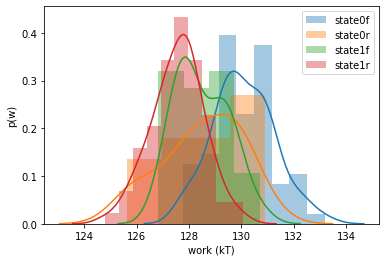

In [54]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [0, 1]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

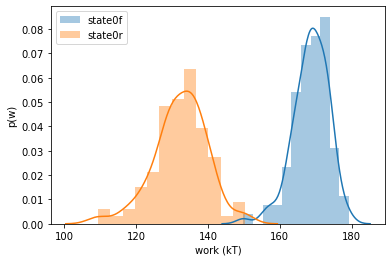

In [55]:
# Plot work distributions
plt.clf()
for i in [0]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [56]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(energy) # Change to exp(-energy*-1)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['apo'] - d_dgs_phase['complex']

In [57]:
import tqdm
states_apo = [0, 1]
states_complex = [0]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:40<00:00, 99.95it/s]


In [58]:
dgs_state_all_T42A = dgs_state_all

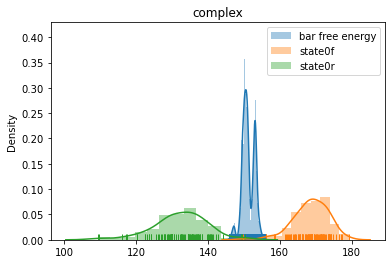

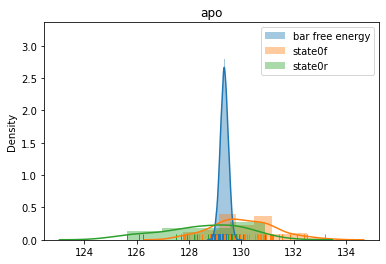

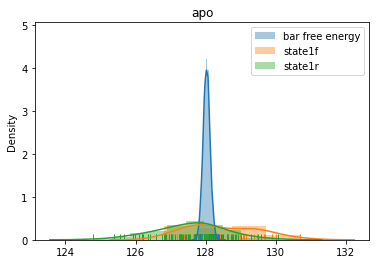

In [59]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

### Compare states A39D vs D39A

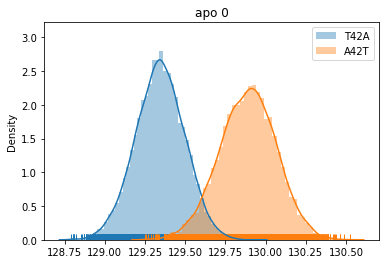

In [60]:
states = [0]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

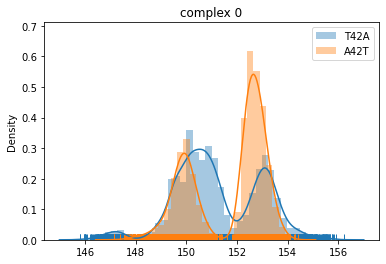

In [61]:
states = [0]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()